In [ ]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split
from torchvision import datasets,transforms,models
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import os
from PIL import Image


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pathlib
root= pathlib.Path('/content/gdrive/My Drive/Micro_Organism')


In [ ]:
train_transform=transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [ ]:
all_data=datasets.ImageFolder(root=root,transform=train_transform)

In [ ]:
train_data,test_data=random_split(all_data,[552,237])

In [ ]:
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10)

In [ ]:
for b,(images,labels) in enumerate(train_loader):
  break

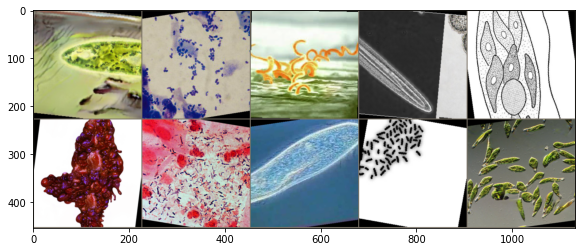

In [ ]:
im=make_grid(images,nrow=5)

inv_norm=transforms.Normalize([-0.485/0.229,-0.456/0.224,-0.406/0.225],[1/0.229,1/0.224,1/0.225])

im_inv=inv_norm(im)

plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(),(1,2,0)))

In [ ]:
class CarsNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,20,3,1)
        self.conv2=nn.Conv2d(20,40,3,1)
        self.conv3=nn.Conv2d(40,60,3,1)
        self.fc1=nn.Linear(26*26*60,150)
        self.fc2=nn.Linear(150,100)
        self.fc3=nn.Linear(100,8)
        
    def forward(self,X):
        X=F.relu(self.conv1(X))
        X=F.max_pool2d(X,2,2)
        
        X=F.relu(self.conv2(X))
        X=F.max_pool2d(X,2,2)
        
        X=F.relu(self.conv3(X))
        X=F.max_pool2d(X,2,2)
        
        X=X.view(-1,26*26*60)
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=self.fc3(X)
        
        return F.log_softmax(X,dim=1)

In [ ]:
torch.manual_seed(108)
model=CarsNN()
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
model



CarsNN(
  (conv1): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(40, 60, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=40560, out_features=150, bias=True)
  (fc2): Linear(in_features=150, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=8, bias=True)
)

In [ ]:
import time

stt=time.time()
epochs=20

train_losses=[]
train_correct=[]




for i in range(epochs):
    trn_corr=0
    
    for b,(X_train,y_train) in enumerate(train_loader):
        b+=1
        y_pred=model(X_train)
        loss=criterion(y_pred,y_train)
        predicted=torch.max(y_pred.data,1)[1]
        btc=(predicted==y_train).sum()
        trn_corr+=btc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%10==0:
            print("epoch",i,"batch",b,'loss',loss.item(),'Accuracy',100*trn_corr.item()/(10*b))
        
    train_losses.append(loss.item())
    train_correct.append(trn_corr)
        
        
        
        
    

print('duration=',(time.time()-stt)/60,'minutes')

epoch 0 batch 10 loss 2.0592873096466064 Accuracy 13.0
epoch 0 batch 20 loss 2.2303194999694824 Accuracy 19.5
epoch 0 batch 30 loss 2.0639424324035645 Accuracy 18.666666666666668
epoch 0 batch 40 loss 2.0899884700775146 Accuracy 21.0
epoch 0 batch 50 loss 1.9187612533569336 Accuracy 23.0
epoch 1 batch 10 loss 2.561206817626953 Accuracy 32.0
epoch 1 batch 20 loss 2.02016282081604 Accuracy 29.5
epoch 1 batch 30 loss 2.0944221019744873 Accuracy 29.333333333333332
epoch 1 batch 40 loss 1.7980577945709229 Accuracy 30.5
epoch 1 batch 50 loss 2.287036418914795 Accuracy 29.8
epoch 2 batch 10 loss 1.6614675521850586 Accuracy 30.0
epoch 2 batch 20 loss 2.0125224590301514 Accuracy 30.5
epoch 2 batch 30 loss 1.6571906805038452 Accuracy 31.333333333333332
epoch 2 batch 40 loss 1.6856918334960938 Accuracy 31.25
epoch 2 batch 50 loss 2.0585885047912598 Accuracy 32.0
epoch 3 batch 10 loss 1.7683265209197998 Accuracy 33.0
epoch 3 batch 20 loss 1.6495749950408936 Accuracy 35.0
epoch 3 batch 30 loss 1.54

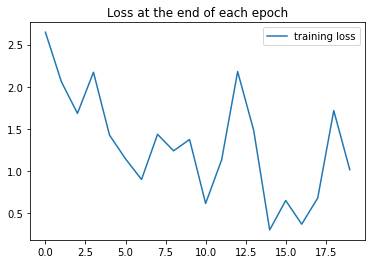

In [ ]:
plt.plot(train_losses, label='training loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [ ]:
model.eval()
with torch.no_grad():
    correct = 0
    for b,(X_test, y_test) in enumerate(test_loader):
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(correct)
print()

tensor(168)



In [ ]:
print("accuracy",100*correct.item()/237)

accuracy 70.88607594936708


In [ ]:
torch.save(model.state_dict(),'microorg.pt')

Index: [    1     2     4     6]
Label: [    6     6     4     6]
Class:  Spiral_bacteria Spiral_bacteria Rod_bacteria Spiral_bacteria

Guess: [    5     0     0     7]
Class:  Spherical_bacteria Amoeba Amoeba Yeast


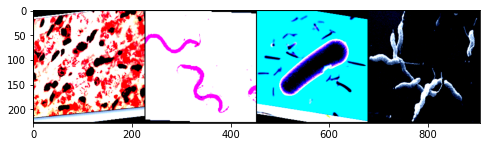

In [68]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        





r = 8   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}')) # to widen the printed array

nextrow = next(row)
lbls = y_test.index_select(0,torch.tensor(nextrow)).numpy()
gues = predicted.index_select(0,torch.tensor(nextrow)).numpy()
print("Index:", nextrow)
print("Label:", lbls)
print("Class: ", *np.array([all_data.classes[i] for i in lbls]))
print()
print("Guess:", gues)
print("Class: ", *np.array([all_data.classes[i] for i in gues]))

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(8,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));